In [1]:
import os
import sys
from pathlib import Path

module_path = str(Path(os.path.abspath('')).parent)
if module_path not in sys.path:
    sys.path.append(module_path)
    
from functions.target_systems import *
from functions.RNCRN_tools import * 
from functions.RNCRN_train import * 
from functions.create_attractors_tools import * 
from functions.create_chimera_tools import * 
from functions.RNCRN_phase_line import * 
from functions.RNCRN_phase_plane import * 
from scipy.integrate import solve_ivp
import numpy as np
import jax.numpy as jnp
import matplotlib.pyplot as plt
import csv

maxInt = sys.maxsize

while True:
    # decrease the maxInt value by factor 10 
    # as long as the OverflowError occurs.

    try:
        csv.field_size_limit(maxInt)
        break
    except OverflowError:
        maxInt = int(maxInt/10)

lower_limit = 1
upper_limit = 9
tFinal =1

In [2]:
def load_data(filename):
    result=[]
    with open(filename,newline='') as csvfile:
        data = csv.reader(csvfile, delimiter=' ', quotechar='|')
        for row in data:
            result.append([float(datapoint) for datapoint in row[0].split(',')])

    result=np.asarray(result) 
    return result

In [3]:
traj_a_2=load_data('data/traj_a_2.csv')
traj_a_3=load_data('data/traj_a_3.csv')
traj_a_6=load_data('data/traj_a_6.csv')
traj_a_7=load_data('data/traj_a_7.csv')

traj_b_2=load_data('data/traj_b_2.csv')
traj_b_3=load_data('data/traj_b_3.csv')
traj_b_6=load_data('data/traj_b_6.csv')
traj_b_7=load_data('data/traj_b_7.csv')

rncrn_dynamics_a=load_data('data/rncrn_dynamics_a.csv')
rncrn_dynamics_b=load_data('data/rncrn_dynamics_b.csv')

target_dynamics_a=load_data('data/target_dynamics_a.csv')
target_dynamics_b=load_data('data/target_dynamics_b.csv')

point_controlled_eq=load_data('data/point_controlled_eq.csv')
point_controlled_params=load_data('data/point_controlled_params.csv')

In [4]:
list_zip = zip(point_controlled_params, point_controlled_eq)
list_zip = sorted(list_zip, key=lambda x: x[0])

result = filter(lambda s:s[0]<1e-2 and s[1] >6.6 and s[0]>=-1.5e-15, list_zip)
params_stable_top, eq_stable_top = zip(*result)
params_stable_top = np.array(params_stable_top)
eq_stable_top = np.array(eq_stable_top)

list_zip = zip(point_controlled_params, point_controlled_eq)
list_zip = sorted(list_zip, key=lambda x: x[0])
result = filter(lambda s:s[0]<1e-2 and s[1] <6.6 and s[0]>=-1.5e-15 and s[1] >4, list_zip)
params_unstable_top, eq_unstable_top = zip(*result)
params_unstable_top = np.array(params_unstable_top)
eq_unstable_top = np.array(eq_unstable_top)


list_zip = zip(point_controlled_params, point_controlled_eq)
list_zip = sorted(list_zip, key=lambda x: x[0])
result = filter(lambda s:s[1] <5 and s[0]>=-1.5e-15, list_zip)
params_stable_bottom, eq_stable_bottom = zip(*result)
params_stable_bottom = np.array(params_stable_bottom)
eq_stable_bottom = np.array(eq_stable_bottom)

C:\Users\ad1114\AppData\Local\Temp\ipykernel_1076\1878464281.py:128: UserWarning: FixedFormatter should only be used together with FixedLocator
  axc.set_xticklabels(['0', '0.2', '0.4', '0.6', '0.8', '1.0'])
C:\Users\ad1114\AppData\Local\Temp\ipykernel_1076\1878464281.py:157: UserWarning: FixedFormatter should only be used together with FixedLocator
  axc.set_xticklabels(['0', '0.2', '0.4', '0.6', '0.8', '1.0'])


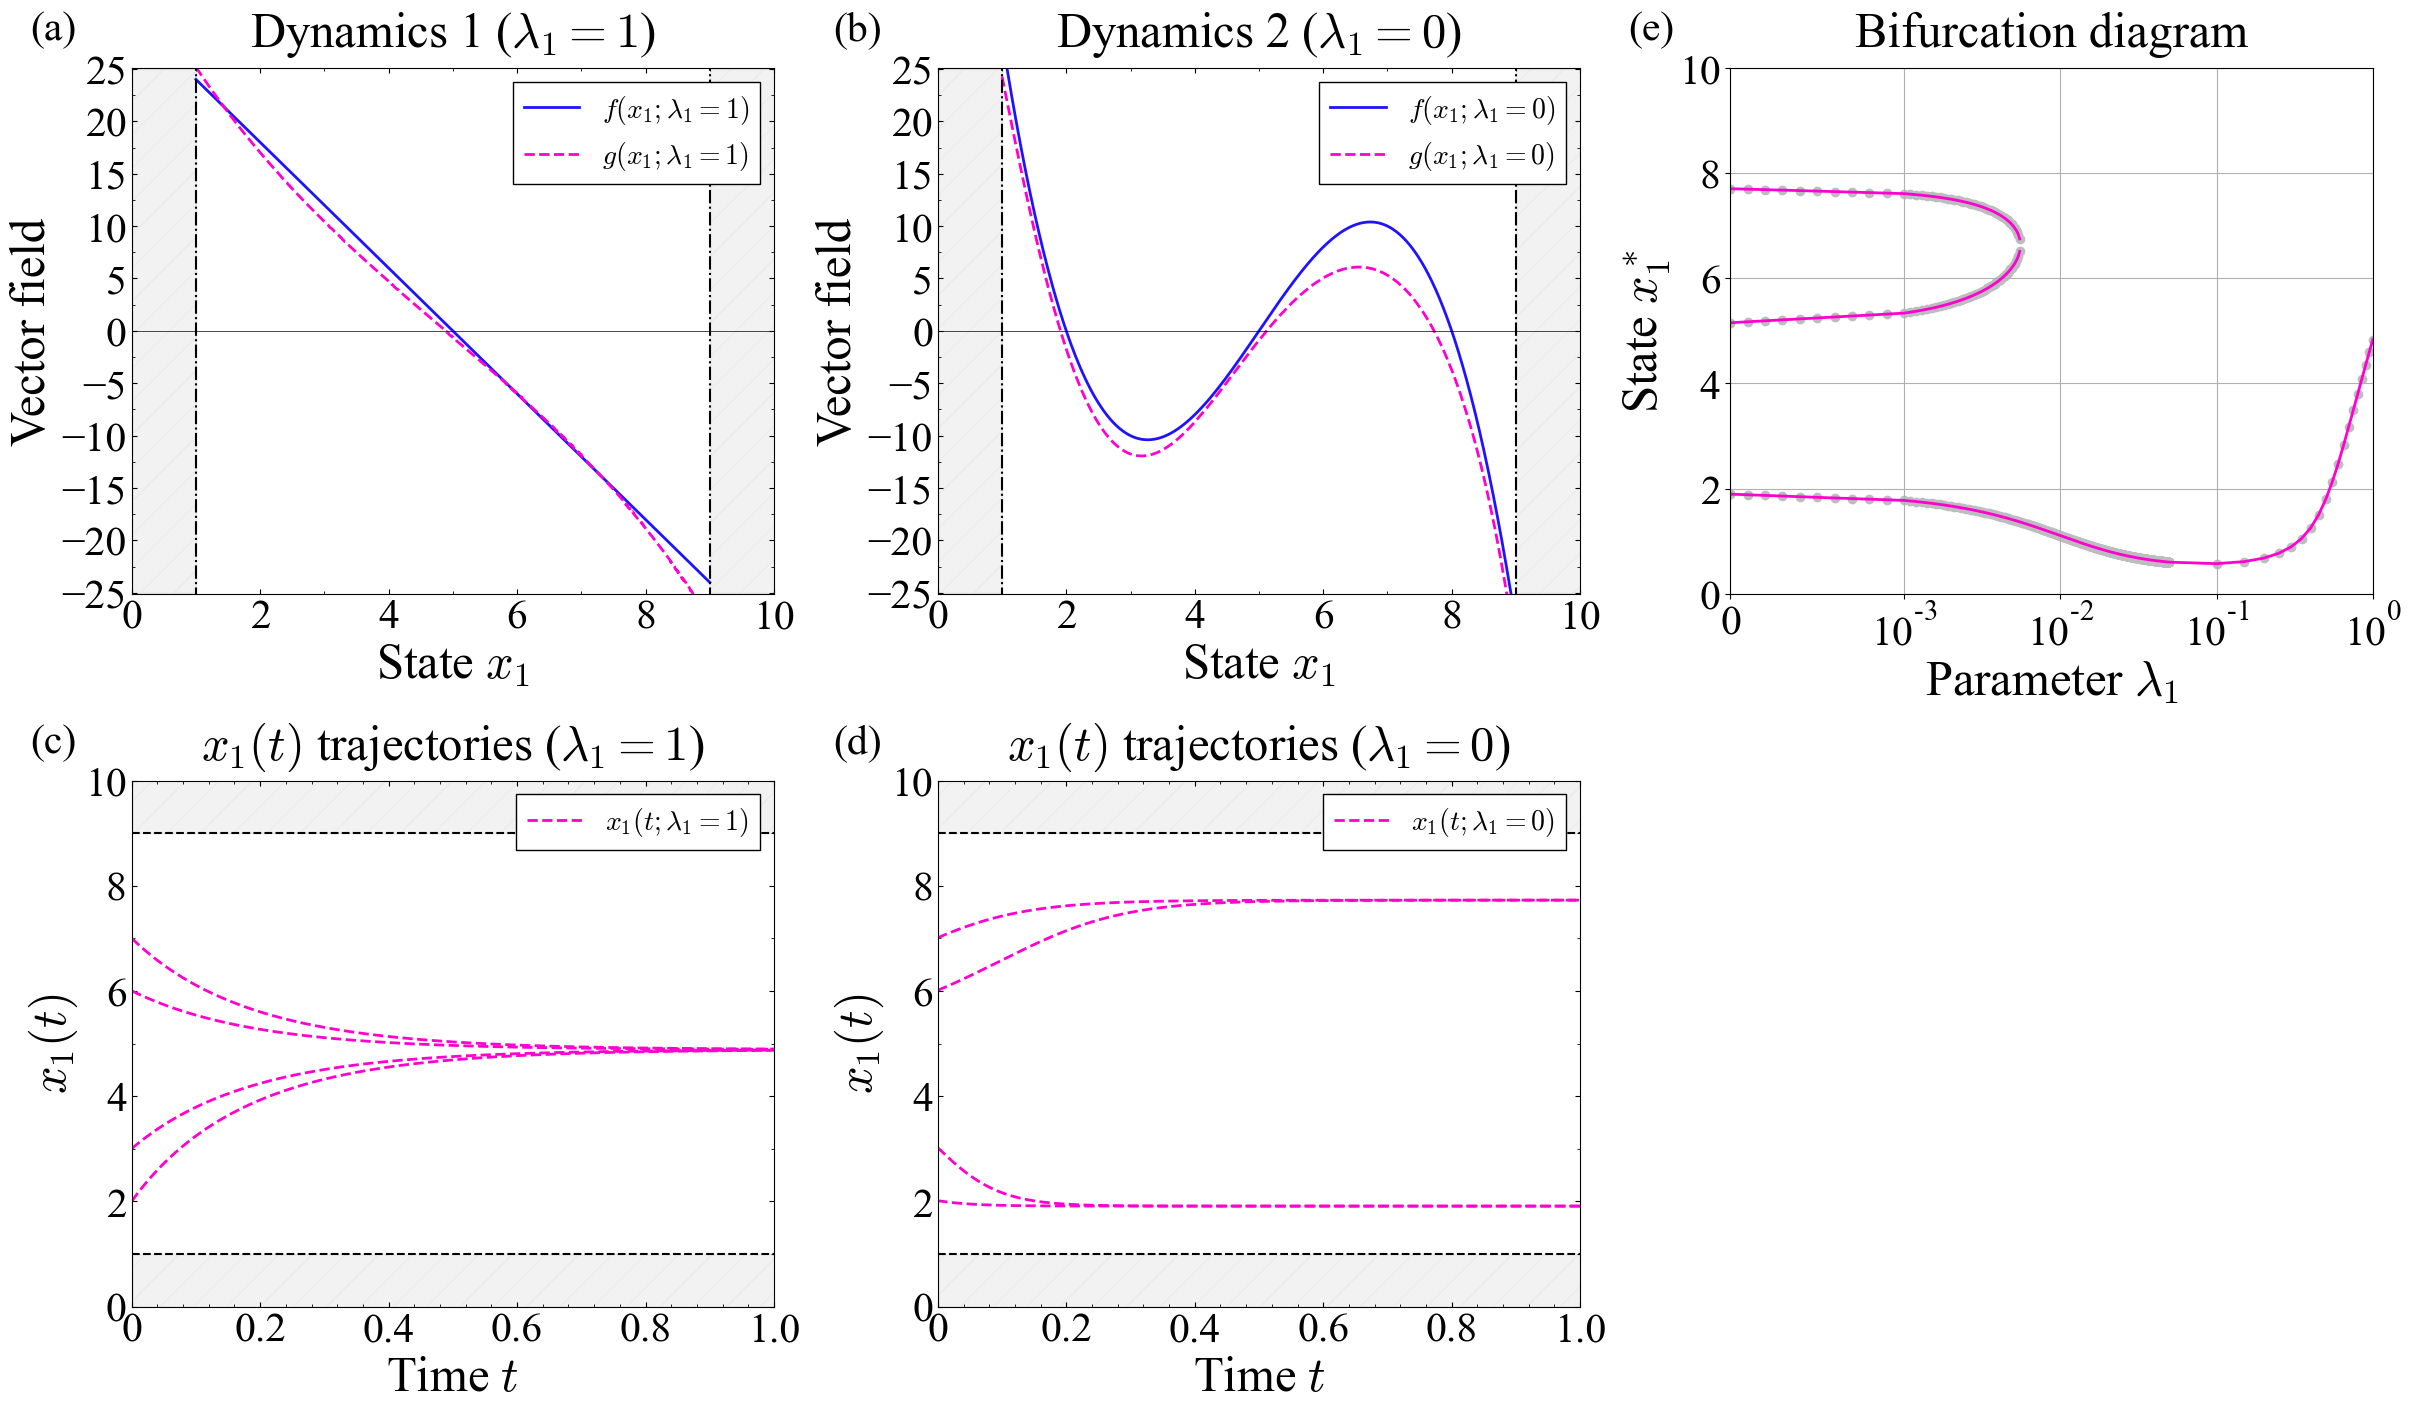

In [5]:
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['font.size'] = 30
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['font.serif'] = 'Times New Roman'
mpl.rcParams['mathtext.fontset'] = 'cm'
mpl.rcParams['font.family'] = 'serif'
plt.rcParams['axes.prop_cycle'] = cycler(alpha=[1])
mpl.rcParams['figure.figsize'] = [20 , 12]
mpl.rcParams['text.usetex'] = False
mpl.rcParams['legend.edgecolor'] = 'k'
mpl.rcParams['legend.framealpha'] = 1
mpl.rcParams['legend.fancybox'] = False
ColList = ['#1F13FF','#FF00D0', '#2A2A72', '#A9A9A9']

mpl.rcParams['figure.figsize'] = [24, 14]

fig, axs = plt.subplot_mosaic([['(a)', '(b)', '(e)'], ['(c)', '(d)', '.' ]],  gridspec_kw={'width_ratios':[1,1, 1]}, layout='constrained')

stablefp = 'limegreen'
linestyle_nodes = '-'
ColList = ['#1F13FF', '#FF00D0', '#2A2A72', '#bbbdbf','#FFAD1F']

mpl.rcParams['legend.frameon'] = True
mpl.rcParams['font.size'] = 30

tickfontsize=30
labelfontsize=35
titlefontsize=35  
legendfontsize = 20;
markersizeval = 10  

density = 1.5
ybound = 25

for label, ax in axs.items():
    # label physical distance to the left and up:
    trans = mtransforms.ScaledTranslation(-40/72, 14/72, fig.dpi_scale_trans)
    ax.text(0.0, 1.0, label, transform=ax.transAxes + trans,
            fontsize='medium', va='bottom', fontfamily='serif', ha='right')


axa = axs['(a)']
axa.plot(target_dynamics_a[0,:], target_dynamics_a[1,:],  color=ColList[0], label='$f(x_1;  \lambda_1 = 1)$')
axa.plot(rncrn_dynamics_a[0,:], rncrn_dynamics_a[1,:],  color=ColList[1], label='$g(x_1; \lambda_1 = 1)$', linestyle='--')
axa.axhline(y=0, color='k', linestyle='-', linewidth=0.5)
axa.set_yticks(np.arange(-ybound, ybound+1, 5), fontsize=tickfontsize)
axa.tick_params(axis='both', which='major' )
axa.legend(fontsize=18)
axa.set_xlabel(r'State $x_1$', fontsize=labelfontsize )
axa.set_ylabel(r'Vector field', fontsize=labelfontsize)
axa.set_xlim(0,10)
axa.set_ylim(-0.1-ybound, 0.1+ybound)
axa.vlines(lower_limit, -ybound-5, ybound+5, facecolor ='white', edgecolor='k', linewidth=1.5, linestyle='dashdot' )
axa.vlines(upper_limit,  -ybound-5, ybound+5, facecolor ='white', edgecolor='k', linewidth=1.5, linestyle='dashdot' )
axa.tick_params(bottom=True, top=True, left=True, right=True)
axa.tick_params(bottom=True, top=True, left=True, right=True, which='minor')
axa.tick_params(axis="x", direction="in", labelsize=tickfontsize)
axa.tick_params(axis="y", direction="in", labelsize=tickfontsize)
axa.tick_params(axis="x", direction="in", which="minor")
axa.tick_params(axis="y", direction="in", which="minor")
axa.xaxis.set_minor_locator(AutoMinorLocator(2))
axa.yaxis.set_minor_locator(AutoMinorLocator(2))
axa.fill([upper_limit, upper_limit, 25, 25], [-ybound, ybound, ybound, -ybound], color = 'gray', alpha=0.1)
axa.fill([0, 0, 1, 1], [-ybound, ybound, ybound, -ybound], color = 'gray', alpha=0.1)
axa.fill([upper_limit, upper_limit, 25, 25], [-ybound, ybound, ybound, -ybound], color = 'None', alpha=0.1, edgecolor=ColList[3], hatch="/")
axa.fill([0, 0, 1, 1], [-ybound, ybound, ybound, -ybound], color = 'None', alpha=0.1,edgecolor=ColList[3], hatch="/")
axa.set_title(r'Dynamics 1 ($\lambda_1 = 1$)', fontsize=titlefontsize, pad=15.5)
axa.legend(fontsize=legendfontsize, loc='upper right')


axa = axs['(b)']
axa.plot(target_dynamics_b[0,:], target_dynamics_b[1,:],  color=ColList[0], label='$f(x_1;  \lambda_1 = 0)$')
axa.plot(rncrn_dynamics_b[0,:], rncrn_dynamics_b[1,:],  color=ColList[1], label='$g(x_1; \lambda_1 = 0)$', linestyle='--' )

axa.axhline(y=0, color='k', linestyle='-', linewidth=0.5)
axa.set_yticks(np.arange(-ybound, ybound+1, 5), fontsize=tickfontsize)
axa.tick_params(axis='both', which='major' )
axa.legend(fontsize=18)
axa.set_xlabel(r'State $x_1$', fontsize=labelfontsize )
axa.set_ylabel(r'Vector field', fontsize=labelfontsize)
axa.set_xlim(0,10)
axa.set_ylim(-0.1-ybound, 0.1+ybound)
axa.vlines(lower_limit, -ybound-5, ybound+5, facecolor ='white', edgecolor='k', linewidth=1.5, linestyle='dashdot' )
axa.vlines(upper_limit,  -ybound-5, ybound+5, facecolor ='white', edgecolor='k', linewidth=1.5, linestyle='dashdot' )
axa.tick_params(bottom=True, top=True, left=True, right=True)
axa.tick_params(bottom=True, top=True, left=True, right=True, which='minor')
axa.tick_params(axis="x", direction="in", labelsize=tickfontsize)
axa.tick_params(axis="y", direction="in", labelsize=tickfontsize)
axa.tick_params(axis="x", direction="in", which="minor")
axa.tick_params(axis="y", direction="in", which="minor")
axa.xaxis.set_minor_locator(AutoMinorLocator(2))
axa.yaxis.set_minor_locator(AutoMinorLocator(2))
axa.fill([upper_limit, upper_limit, 25, 25], [-ybound, ybound, ybound, -ybound], color = 'gray', alpha=0.1)
axa.fill([0, 0, 1, 1], [-ybound, ybound, ybound, -ybound], color = 'gray', alpha=0.1)
axa.fill([upper_limit, upper_limit, 25, 25], [-ybound, ybound, ybound, -ybound], color = 'None', alpha=0.1, edgecolor=ColList[3], hatch="/")
axa.fill([0, 0, 1, 1], [-ybound, ybound, ybound, -ybound], color = 'None', alpha=0.1,edgecolor=ColList[3], hatch="/")
axa.set_title(r'Dynamics 2 ($\lambda_1 = 0$)', fontsize=titlefontsize, pad=15.5)
axa.legend(fontsize=legendfontsize, loc='upper right')


axc = axs['(c)']
axc.plot(traj_a_2[0,:], traj_a_2[1,:], color=ColList[1], linestyle='--', label='$x_1(t; \lambda_1 = 1)$')
axc.plot(traj_a_3[0,:], traj_a_3[1,:], color=ColList[1], linestyle='--' )
axc.plot(traj_a_6[0,:], traj_a_6[1,:], color=ColList[1], linestyle='--' )
axc.plot(traj_a_7[0,:], traj_a_7[1,:], color=ColList[1], linestyle='--' )
axc.hlines(1, 0, 20, facecolor ='white', edgecolor='k', linewidth=1.5, linestyle='--' )
axc.hlines(upper_limit, 0, 20, facecolor ='white', edgecolor='k', linewidth=1.5, linestyle='--' )
axc.tick_params(axis='both', which='major')
axc.set_xlabel(r'Time $t$', fontsize=labelfontsize )
axc.set_ylabel(r'$x_1(t)$', fontsize=labelfontsize )
axc.set_xlim(0,tFinal)
axc.set_ylim(0, 10)
axc.set_ymargin(10)
axc.tick_params(bottom=True, top=True, left=True, right=True)
axc.tick_params(bottom=True, top=True, left=True, right=True, which='minor')
axc.tick_params(axis="x", direction="in", labelsize=tickfontsize)
axc.tick_params(axis="y", direction="in", labelsize=tickfontsize)
axc.tick_params(axis="x", direction="in", which="minor")
axc.tick_params(axis="y", direction="in", which="minor")
axc.xaxis.set_minor_locator(AutoMinorLocator(5))
axc.yaxis.set_minor_locator(AutoMinorLocator(2))
axc.fill([0, 0, 20, 20], [upper_limit, 25, 25, upper_limit], color = 'gray', alpha=0.1)
axc.fill([0, 0, 20, 20], [upper_limit, 25, 25, upper_limit], color = 'None', alpha=0.1, edgecolor=ColList[3], hatch="/")
axc.fill([0, 0, 20, 20], [0, 1, 1, 0], color = 'gray', alpha=0.1)
axc.fill([0, 0, 20, 20], [0, 1, 1, 0], color = 'None', alpha=0.1, edgecolor=ColList[3], hatch="/")
axc.set_title(r'$x_1(t)$ trajectories ($\lambda_1 = 1$)', fontsize=titlefontsize,pad=15.5)
axc.legend(fontsize=legendfontsize, loc='upper right')
axc.set_xticklabels(['0', '0.2', '0.4', '0.6', '0.8', '1.0'])

axc = axs['(d)']
axc.plot(traj_b_2[0,:], traj_b_2[1,:], color=ColList[1], linestyle='--', label='$x_1(t; \lambda_1 = 0)$' )
axc.plot(traj_b_3[0,:], traj_b_3[1,:], color=ColList[1], linestyle='--' )
axc.plot(traj_b_6[0,:], traj_b_6[1,:], color=ColList[1], linestyle='--' )
axc.plot(traj_b_7[0,:], traj_b_7[1,:], color=ColList[1], linestyle='--' )
axc.hlines(1, 0, 20, facecolor ='white', edgecolor='k', linewidth=1.5, linestyle='--' )
axc.hlines(upper_limit, 0, 20, facecolor ='white', edgecolor='k', linewidth=1.5, linestyle='--' )
axc.tick_params(axis='both', which='major')
axc.set_xlabel(r'Time $t$', fontsize=labelfontsize )
axc.set_ylabel(r'$x_1(t)$', fontsize=labelfontsize )
axc.set_xlim(0,tFinal)
axc.set_ylim(0, 10)
axc.set_ymargin(10)
axc.tick_params(bottom=True, top=True, left=True, right=True)
axc.tick_params(bottom=True, top=True, left=True, right=True, which='minor')
axc.tick_params(axis="x", direction="in", labelsize=tickfontsize)
axc.tick_params(axis="y", direction="in", labelsize=tickfontsize)
axc.tick_params(axis="x", direction="in", which="minor")
axc.tick_params(axis="y", direction="in", which="minor")
axc.xaxis.set_minor_locator(AutoMinorLocator(5))
axc.yaxis.set_minor_locator(AutoMinorLocator(2))
axc.fill([0, 0, 20, 20], [upper_limit, 25, 25, upper_limit], color = 'gray', alpha=0.1)
axc.fill([0, 0, 20, 20], [upper_limit, 25, 25, upper_limit], color = 'None', alpha=0.1, edgecolor=ColList[3], hatch="/")
axc.fill([0, 0, 20, 20], [0, 1, 1, 0], color = 'gray', alpha=0.1)
axc.fill([0, 0, 20, 20], [0, 1, 1, 0], color = 'None', alpha=0.1, edgecolor=ColList[3], hatch="/")
axc.set_title(r'$x_1(t)$ trajectories ($\lambda_1 = 0$)', fontsize=titlefontsize,pad=15.5)
axc.legend(fontsize=legendfontsize, loc='upper right')
axc.set_xticklabels(['0', '0.2', '0.4', '0.6', '0.8', '1.0'])

axe = axs['(e)']
      
axe.scatter(point_controlled_params, point_controlled_eq, c=ColList[3])
axe.plot(params_stable_top, eq_stable_top, color=ColList[1])
axe.plot(params_unstable_top, eq_unstable_top, color=ColList[1])
axe.plot(params_stable_bottom, eq_stable_bottom, color=ColList[1])

axe.set_xscale('symlog', linthresh=1e-3)
axe.grid()
axe.set_ylim(0, 10)

axe.set_title(r'Bifurcation diagram', fontsize=titlefontsize,pad=15.5)
axe.set_xlabel(r'Parameter $\lambda_1$', fontsize=titlefontsize)
axe.set_ylabel(r'State $x_1^*$', fontsize=titlefontsize)
axe.set_xlim([0, 1])

#plt.tight_layout()
fig.savefig('figures/figure_3.pdf', bbox_inches='tight')
plt.show()


In [6]:
print(np.mean(np.square(target_dynamics_a[1,:] - rncrn_dynamics_a[1,:])))
print(np.mean(np.square(target_dynamics_b[1,:] - rncrn_dynamics_b[1,:])))

1.3318619560003044
7.212488221328158
